# Importing Libraries

Importing Neccessary Library

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np


# Reading the Dataset.

Reading the Dataset from the link and storing it in a dataframe.

In [3]:
data=pd.read_csv("https://data.cdc.gov/api/views/7b9s-s8ck/rows.csv")

<ipython-input-3-699609d7747d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("https://data.cdc.gov/api/views/7b9s-s8ck/rows.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770240 entries, 0 to 5770239
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        object 
 1   LocationAbbr                object 
 2   LocationDesc                object 
 3   GeographicLevel             object 
 4   DataSource                  object 
 5   Class                       object 
 6   Topic                       object 
 7   Data_Value                  float64
 8   Data_Value_Unit             object 
 9   Data_Value_Type             object 
 10  Data_Value_Footnote_Symbol  object 
 11  Data_Value_Footnote         object 
 12  Confidence_limit_Low        float64
 13  Confidence_limit_High       float64
 14  StratificationCategory1     object 
 15  Stratification1             object 
 16  StratificationCategory2     object 
 17  Stratification2             object 
 18  StratificationCategory3     object 
 19  Stratification3      

# Data Preprocessing

Dropping Unwanted Columns

In [5]:
mortality_data=data.drop(['Class','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','DataSource','StratificationCategory1','StratificationCategory2','StratificationCategory3','GeographicLevel','Confidence_limit_Low','Confidence_limit_High','LocationID'], axis=1)

Updating Names of Columns to be more explanatory.

In [6]:
mortality_data=mortality_data.rename(columns={'Stratification1': 'Age_Category'})
mortality_data=mortality_data.rename(columns={'Stratification2': 'Race/Ethnicity'})
mortality_data=mortality_data.rename(columns={'Stratification3': 'Gender'})
mortality_data=mortality_data.rename(columns={'Data_Value': 'Mortality_Rate'})
mortality_data

,Year,LocationAbbr,LocationDesc,Topic,Mortality_Rate,Age_Category,Race/Ethnicity,Gender
0,1999,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
...,...,...,...,...,...,...,...,...
5770235,1999 - 2010,WY,Weston,Coronary heart disease (CHD),-33.4,Ages 65 years and older,White,Overall
5770236,2010 - 2019,WY,Weston,Cardiovascular disease (CVD),-6.7,Ages 65 years and older,White,Overall
5770237,1999 - 2010,WY,Weston,Cardiovascular disease (CVD),-31.5,Ages 65 years and older,White,Overall
5770238,1999 - 2010,WY,Weston,Heart failure,-20.0,Ages 65 years and older,White,Overall


In [7]:
mortality_data.isna().sum()

Year                    0
LocationAbbr            0
LocationDesc            0
Topic                   0
Mortality_Rate    2365475
Age_Category            0
Race/Ethnicity          0
Gender                  0
dtype: int64

Chceking out all the Year values for we have Mortality Data in United States.

In [8]:
mortality_data['Year'].unique()

array([1999, 2013, 2014, 2005, 2012, 2010, 2009, 2011, 2007, 2019, 2018,
       2004, 2016, 2015, 2000, 2002, 2003, 2006, 2008, 2001, 2017, '2008',
       '2010', '2014', '2016', '2007', '2000', '2002', '2003', '2005',
       '1999', '2013', '2004', '2001', '2017', '2006', '2009', '2012',
       '2015', '2018', '2019', '2011', '1999 - 2010', '2010 - 2019'],
      dtype=object)

As we can see that there is data present in multiple types and has datatype as object. Also we can see that there are 2 entries of years in dataset 2010-2019 and 1999-2010. So dropping all those records as we have the the same data present in individual year entries.

In [9]:
condition = (mortality_data['Year'] == '1999 - 2010') | (mortality_data['Year'] == '2010 - 2019')
mortality_data = mortality_data[~condition]
mortality_data

,Year,LocationAbbr,LocationDesc,Topic,Mortality_Rate,Age_Category,Race/Ethnicity,Gender
0,1999,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,Autauga,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
...,...,...,...,...,...,...,...,...
5268494,2006,WY,Weston,Heart failure,589.3,Ages 65 years and older,White,Overall
5268495,2013,WY,Weston,Heart failure,474.9,Ages 65 years and older,White,Overall
5268496,2004,WY,Weston,Heart failure,600.2,Ages 65 years and older,White,Overall
5268497,2005,WY,Weston,Heart failure,594.9,Ages 65 years and older,White,Overall


As from the above array of year, we can also see that the Year is mentioned in various datatypes like int,str. So, now converting the 'Year' column values to 'int' type.

In [14]:
mortality_data = mortality_data.copy()
mortality_data['Year'] = mortality_data['Year'].astype(int)

Filtering out the data to focus on the years 2015-2019 for the mortality rate in US.

In [15]:
mortality_data = mortality_data[(mortality_data['Year'] >= 2015) & (mortality_data['Year'] <= 2019)]

Sorting the Dataframe by LocationAbbr and then by Year.

In [16]:
mortality_data = mortality_data.sort_values(by=['LocationAbbr', 'Year'])
mortality_data

,Year,LocationAbbr,LocationDesc,Topic,Mortality_Rate,Age_Category,Race/Ethnicity,Gender
112573,2015,AK,Aleutians East,All heart disease,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112581,2015,AK,Aleutians East,All stroke,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112604,2015,AK,Aleutians East,Coronary heart disease (CHD),NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112625,2015,AK,Aleutians East,Cardiovascular disease (CVD),NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112647,2015,AK,Aleutians East,Heart failure,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
...,...,...,...,...,...,...,...,...
5268398,2019,WY,Weston,All heart disease,1004.6,Ages 65 years and older,White,Overall
5268421,2019,WY,Weston,All stroke,215.6,Ages 65 years and older,White,Overall
5268438,2019,WY,Weston,Coronary heart disease (CHD),570.7,Ages 65 years and older,White,Overall
5268462,2019,WY,Weston,Cardiovascular disease (CVD),1277.3,Ages 65 years and older,White,Overall


Checking for null values present in the mortality_data datframe.

In [17]:
mortality_data.isna().mean().round(4)*100

Year               0.00
LocationAbbr       0.00
LocationDesc       0.00
Topic              0.00
Mortality_Rate    40.99
Age_Category       0.00
Race/Ethnicity     0.00
Gender             0.00
dtype: float64

How are data values missing?

<Axes: >

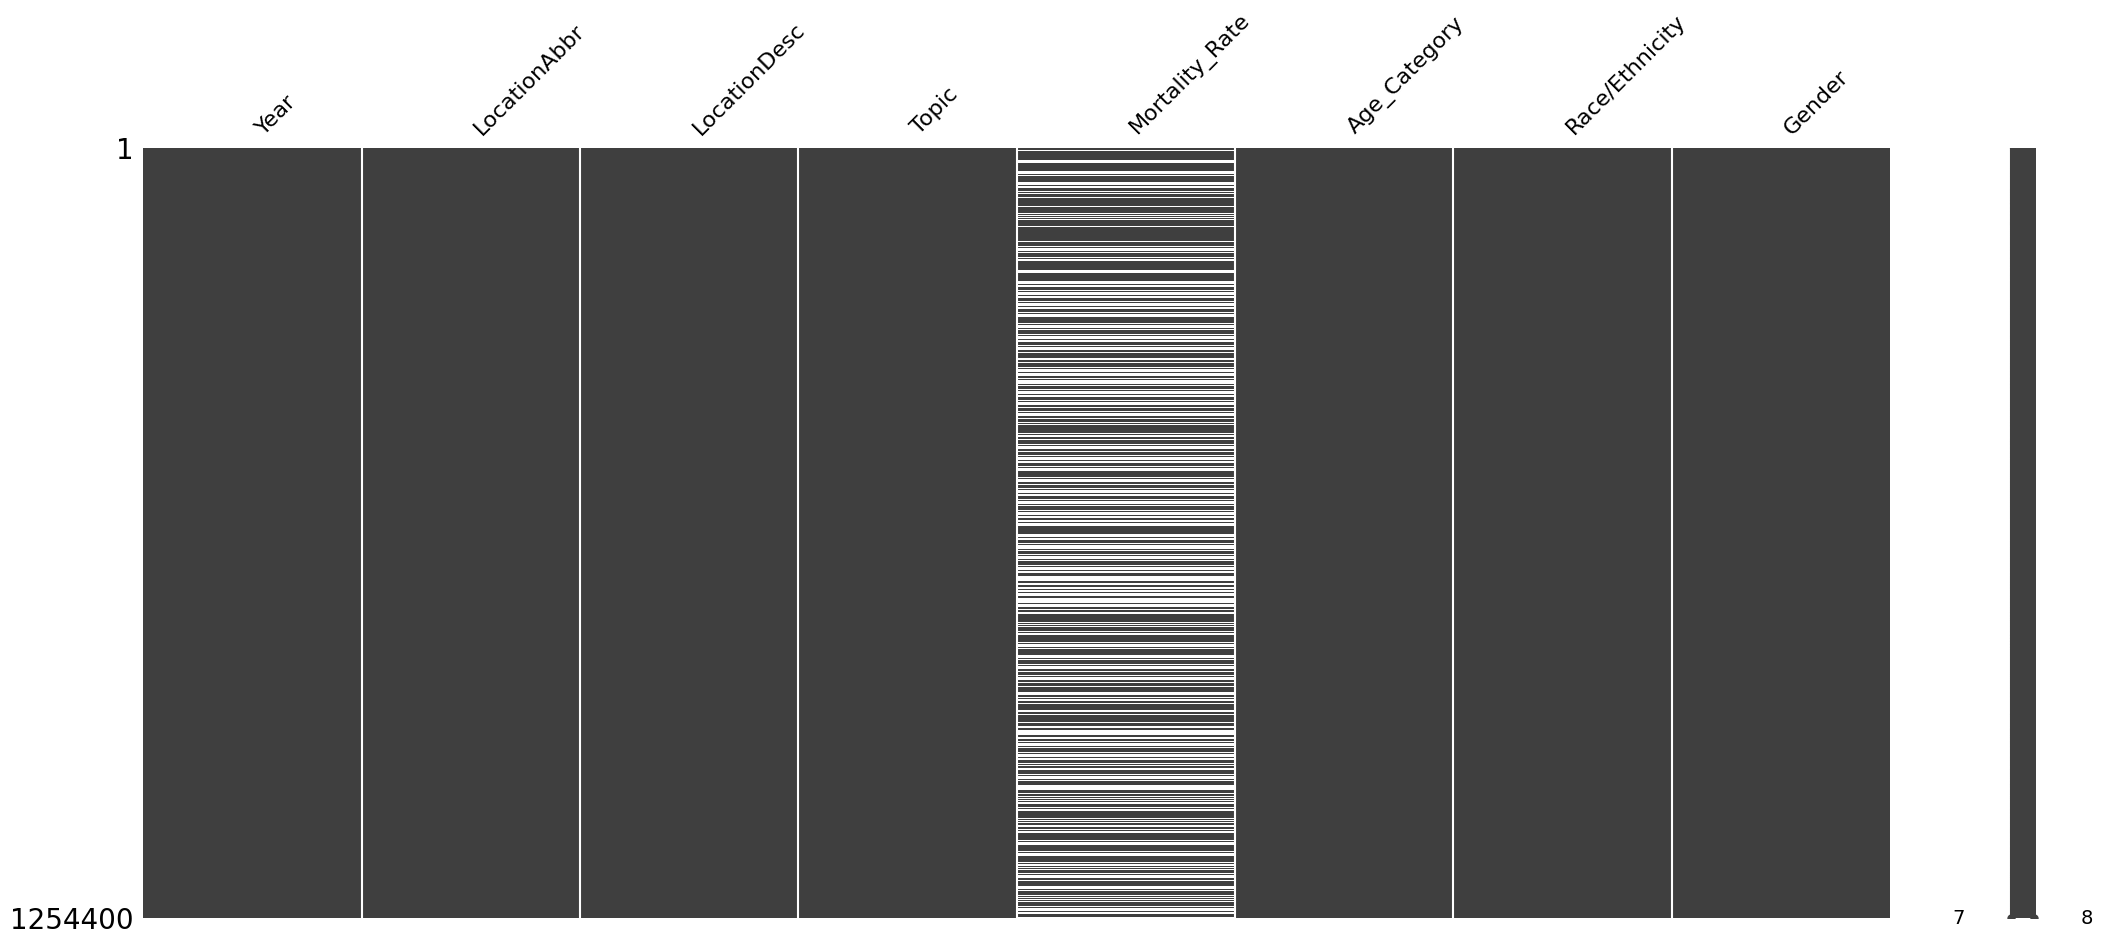

In [25]:
msno.matrix(mortality_data)

Dropping the NA values present in the Mortality_Rate Column.

In [26]:
mortality_na_updated=mortality_data.dropna(subset=['Mortality_Rate'])
mortality_na_updated

,Year,LocationAbbr,LocationDesc,Topic,Mortality_Rate,Age_Category,Race/Ethnicity,Gender
112678,2015,AK,Aleutians East,All heart disease,57.8,Ages 35-64 years,Overall,Overall
112699,2015,AK,Aleutians East,All stroke,23.5,Ages 35-64 years,Overall,Overall
112712,2015,AK,Aleutians East,Coronary heart disease (CHD),47.8,Ages 35-64 years,Overall,Overall
112743,2015,AK,Aleutians East,Cardiovascular disease (CVD),59.0,Ages 35-64 years,Overall,Overall
112767,2015,AK,Aleutians East,Heart failure,16.6,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...
5268398,2019,WY,Weston,All heart disease,1004.6,Ages 65 years and older,White,Overall
5268421,2019,WY,Weston,All stroke,215.6,Ages 65 years and older,White,Overall
5268438,2019,WY,Weston,Coronary heart disease (CHD),570.7,Ages 65 years and older,White,Overall
5268462,2019,WY,Weston,Cardiovascular disease (CVD),1277.3,Ages 65 years and older,White,Overall


Resetting the index of the dataframe to start from 0.

In [27]:
mortality_data_reset_indexed = mortality_na_updated.reset_index(drop=True)
mortality_data_reset_indexed

,Year,LocationAbbr,LocationDesc,Topic,Mortality_Rate,Age_Category,Race/Ethnicity,Gender
0,2015,AK,Aleutians East,All heart disease,57.8,Ages 35-64 years,Overall,Overall
1,2015,AK,Aleutians East,All stroke,23.5,Ages 35-64 years,Overall,Overall
2,2015,AK,Aleutians East,Coronary heart disease (CHD),47.8,Ages 35-64 years,Overall,Overall
3,2015,AK,Aleutians East,Cardiovascular disease (CVD),59.0,Ages 35-64 years,Overall,Overall
4,2015,AK,Aleutians East,Heart failure,16.6,Ages 35-64 years,Overall,Overall
...,...,...,...,...,...,...,...,...
740245,2019,WY,Weston,All heart disease,1004.6,Ages 65 years and older,White,Overall
740246,2019,WY,Weston,All stroke,215.6,Ages 65 years and older,White,Overall
740247,2019,WY,Weston,Coronary heart disease (CHD),570.7,Ages 65 years and older,White,Overall
740248,2019,WY,Weston,Cardiovascular disease (CVD),1277.3,Ages 65 years and older,White,Overall


Exporting the dataframe to a csv file.

In [50]:
mortality_data_reset_indexed.to_csv('Heart_Mortality_2015_2019.csv', index=False)
from google.colab import files
files.download('Heart_Mortality_2015_2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

Creating a boxplot for the Mortality Rate be Age Category.

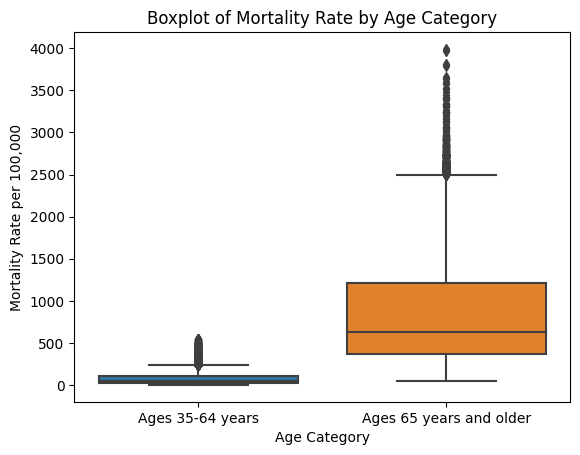

In [30]:
sns.boxplot(x='Age_Category', y='Mortality_Rate', data=mortality_data_reset_indexed)

plt.title('Boxplot of Mortality Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Mortality Rate per 100,000')

plt.show()


The above box-plot shows the ditribution of mortality rate per 100,000 for two different age groups 35-64 years and 65+ years due to Heart Disease.

From this plot, we can deduce that :-
* The mesian mortality rate for 35-64 years age group is very narrow, i.e. very little variations in the values.
* The median mortality of age group 35-64 years is quite low as compared to 65+ years age group.
* There are a significant number of outliers for the 65 years and older age group, suggesting that there are individual values of mortality rate that are much higher than the rest.

Mean Mortality Rate on Year on Year basis.
Creating boxplots for Mean Mortality Rate for all locations in a year by year basis due to heart diseases.

In [33]:
mean_mortality_by_year = mortality_data_reset_indexed.groupby('Year')['Mortality_Rate'].mean().reset_index()
mean_mortality_by_year


,Year,Mortality_Rate
0,2015,422.396760
1,2016,414.954829
2,2017,415.286313
3,2018,410.242330
4,2019,406.414249


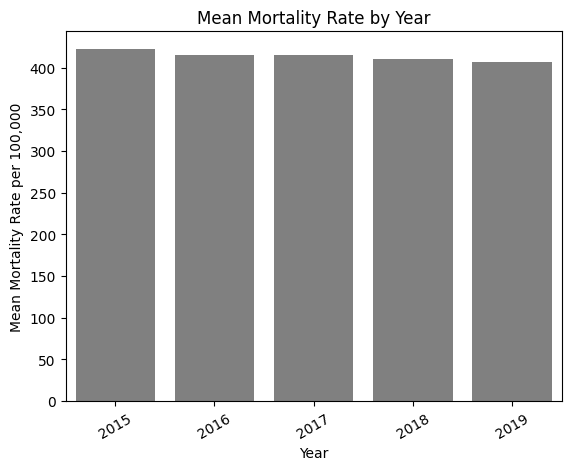

In [37]:
sns.barplot(x='Year', y='Mortality_Rate', data=mean_mortality_by_year, color='grey')

plt.title('Mean Mortality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate per 100,000')

plt.xticks(rotation=30)
plt.show()

From the above boxplot, we can observe that while there are some variations in the mean mortality rates over the years, the values do not significantly fluctuate. There seems to be a very slight decreasing trend from 2015 to 2019.

**Mortality Rate by The Race/Ethnicity.**  
Creating a boxplot for this for the Mortality Rate vs Race and Ethnicity.

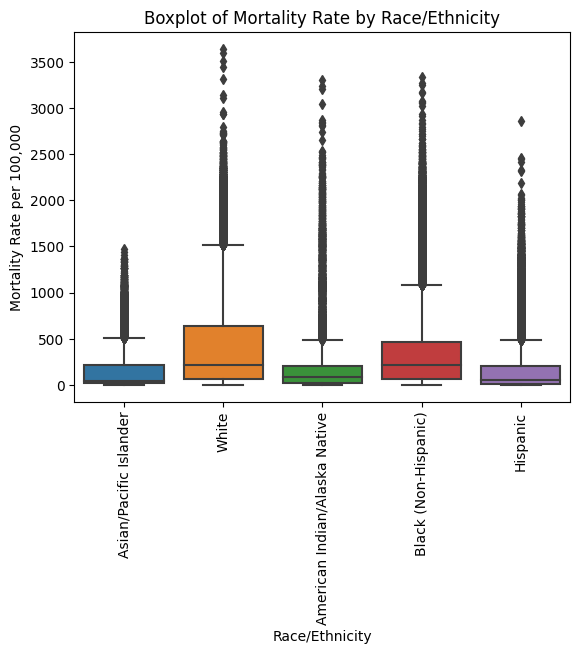

In [47]:
filtered_data = mortality_data_reset_indexed[mortality_data_reset_indexed['Race/Ethnicity'] != 'Overall']

sns.boxplot(x='Race/Ethnicity', y='Mortality_Rate', data=filtered_data)

plt.title('Boxplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate per 100,000')
plt.xticks(rotation=90)
plt.show()


There we see multiple outliers, so ploting same on a log scale to get a better understanding.

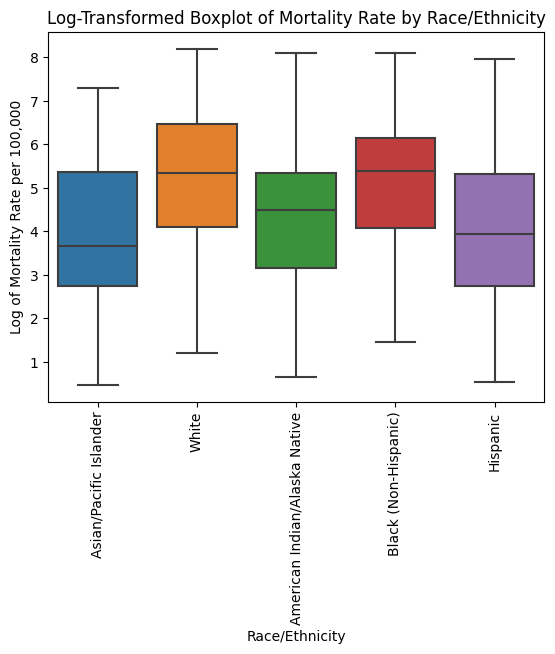

In [46]:
filtered_data = mortality_data_reset_indexed[mortality_data_reset_indexed['Race/Ethnicity'] != 'Overall']
sns.boxplot(x='Race/Ethnicity', y=np.log1p(filtered_data['Mortality_Rate']), data=filtered_data)

plt.title('Log-Transformed Boxplot of Mortality Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Log of Mortality Rate per 100,000')
plt.xticks(rotation=90)
plt.show()

This box plot gives much clearer understanding for the Race-Ethnicity with Mortality Rates.
* This log transformation reduces impact of extreme values, the outliers are still present in the plot but due to log scale there distance from median values is reduced.